# Data loading and visualization 
## Part 1 of the series of notebooks to solve the competition

In this notebook, data analysis and visualization is performed on training and testing data sets. It is inspired by the available competition notebooks and the discussion form.

## Content:
  - [Import required modules](#Import%20required%20modules)
  - [load data](#load%20data)
  

### Import required modules

In [48]:
# jupyter majec function to print images inlined
%matplotlib inline 

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # ploting.
import seaborn as sns # more cool plotting 
from nltk.corpus import stopwords # load stoping words
from nltk.tokenize import word_tokenize # word tokenizer
import operator

pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 4000

import re # Regular expression

### load data

In [4]:
dataPath = 'dataset'

#Training data
train = pd.read_csv(dataPath+'/train.csv')
# Testing data 
test = pd.read_csv(dataPath+'/test.csv')

for col in train.columns:
    train[col] = train[col].astype(str)
for col in test.columns:
    test[col] = test[col].astype(str)

print("Train data of shape",train.shape)
print("Test data of shape",test.shape)

Train data of shape (27486, 4)
Test data of shape (3535, 3)


In [49]:
# train data sample
elements_from_head=100 # number of elements to show from head

print("Train data first", elements_from_head, "samples")
train.head(elements_from_head)

Train data first 100 samples


,textID,text,selected_text,sentiment
0,a3d0a7d5ad,"Spent the entire morning in a meeting w/ a vendor, and my boss was not happy w/ them. Lots of fun. I had other plans for my morning",my boss was not happy w/ them. Lots of fun.,neutral
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! http://plurk.com/p/wxpdj,says good (or should i say bad?) afternoon!,neutral
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive
5,1915bebcb3,headache wanna see my Julie,headache,negative
6,2ab82634d5,had an awsome salad! I recommend getting the Spicey buffalo chicken salad!,had an awsome salad!,positive
7,a5a1c996c0,fine! Going to do my big walk today 20 or so miles,fine!,positive
8,a182b2638e,Thank a yoou how are you? #TwitterTakeover,Thank,positive
9,1dcb6fdb13,Why don't adobe realise no one WANTS to pay for Photoshop et al so they should just give it to us for free,Why don't adobe realise no one WANTS to pay for Photoshop et al so they should just give it to us for free,neutral


In [50]:
# train data sample
elements_random=100 # number of random elements to show

print("Train data random", elements_random, "samples")
train.sample(elements_random) 

Train data random 100 samples


,textID,text,selected_text,sentiment
11707,697300ea10,stopped working on the image database awhile ago to help Greg with his term paper. Now chit chatting with Greg.,stopped working on the image database awhile ago to help Greg with his term paper. Now chit chatting with Greg.,neutral
11758,dcb8c622d6,"Omg, someone just left me a voicemail at work ffs let me have a day off","Omg, someone just left me a voicemail at work ffs let me have a day off",neutral
24070,4ba0e88523,love the sweet g'nights every night,love,positive
1227,d2fa274633,But ... but ... who will produce the next Starsailor record?,But ... but ... who will produce the next Starsailor record?,neutral
18023,00ce50e664,got caught in the rain outside. now im cold bbbbrrrrrrrrr,got caught in the rain outside. now im cold bbbbrrrrrrrr,neutral
2539,4123075cf7,Is it possible to a have phobia of phobias? Afraid to look at list.,Is it possible to a have phobia of phobias? Afraid to look at list.,negative
10836,3f6f92a0f7,i would but i have nowhere to go and no one to go with,i have nowhere to go and no one to go with,negative
3475,0b43df0462,"it's stable, faster than 2.x and working.","it's stable, faster than 2.x and working.",neutral
15775,f9f01177e8,upset.. friday night crying!,crying!,negative
23250,5084a2977e,"went on a long 10 mile bike ride today, then it started raining","went on a long 10 mile bike ride today, then it started raining",neutral


In [9]:
# test data sample

print("Test data first", elements_from_head, "samples")
test.head(elements_from_head)

Test data first 10 samples


,textID,text,sentiment
0,11aa4945ff,http://twitpic.com/67swx - i wish i was calli...,positive
1,fd1db57dc0,i'm done.haha. HOUSE MD marathon ulet,positive
2,2524332d66,I'm concerned for that family,positive
3,0fb19285b2,HEY GUYS IT'S WORKING NO NEED TO WORRY. i have...,positive
4,e6c9e5e3ab,26th February,neutral
5,311d2b185b,Tracy and Berwick breaks my achy breaky heart ...,negative
6,95dfefd4e7,Well off 2 bed...cant wait 2 party 4 Mother's ...,positive
7,739f17cfe1,Oh yeah the camera clipping problems with Void...,positive
8,c6322a85c2,_Layne hmm.. what's ur fav movie?? tv shows??,neutral
9,b4401d6b4d,"salt and vinegar, cheese and onion make your ...",negative


In [10]:
print("Test data random", elements_random, "samples")
test.sample(elements_random)

Test data random 10 samples


,textID,text,sentiment
2480,07dbf16cf0,ya. i was suffering the whole day yesterday. ...,neutral
1285,132462ca21,: unfortunately not. I have to take it to a r...,negative
2426,4d9a27e25a,don't you need a server and someone who knows...,neutral
2795,2d5b920414,I'll have to wait for the YouTube links,neutral
1684,b667160840,then ill post it,neutral
1612,792c97a352,my best friends bought something which i reall...,positive
2657,51bdb4d865,Feeling very tierd! too much college work!!!!!!,negative
3103,c12a98d8f3,i so can't be bothered working tomorrow!,positive
3317,ec8507eef4,haha. Thanks Shannon. 3 out of 5 boats got f...,positive
3422,558fe1316b,On a 10min brake. At wrrkk ... its 11:06 and i...,neutral


### Data analysis

Training data
Number of positive is 11118, number of negative is 8582, and number of neutral is 7786
Train Data Sentiment


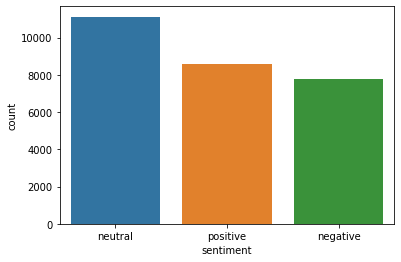

In [11]:
pos,neg,nat=train['sentiment'].value_counts()


print("Training data")
print("Number of positive is {}, number of negative is {}, and number of neutral is {}".format(pos,neg,nat))
sns.countplot(x='sentiment',data=train)
print("Train Data Sentiment")

Testing data
Number of positive is 1430, number of negative is 1104, and number of neutral is 1001
Test Data Sentiment


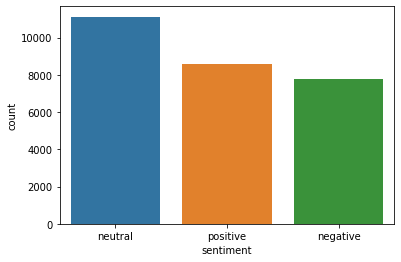

In [12]:
pos2,neg2,nat2=test['sentiment'].value_counts()


print("Testing data")
print("Number of positive is {}, number of negative is {}, and number of neutral is {}".format(pos2,neg2,nat2))
sns.countplot(x='sentiment',data=train)
print("Test Data Sentiment")

Train - Test
Number of positive is -2.9332150166982984e-05, number of negative is -7.383468256078052e-05, and number of neutral is 0.00010316683272781901


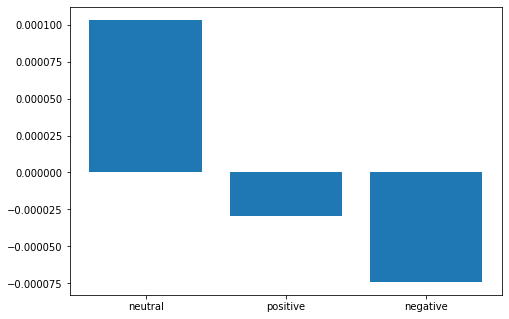

In [13]:
sentament = ["neutral","positive","negative"]
diff=[nat/train.shape[0]-nat2/test.shape[0], pos/train.shape[0]-pos2/test.shape[0], neg/train.shape[0]-neg2/test.shape[0]]

print("Train - Test")
print("Number of positive is {}, number of negative is {}, and number of neutral is {}".format(diff[1],diff[2],diff[0]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentament,diff)
plt.show()

### Length distrepution befor data cleaning 

max: 165, min: 3, mean: 68.725


Text(0.5, 1.0, 'Train text length distribution')

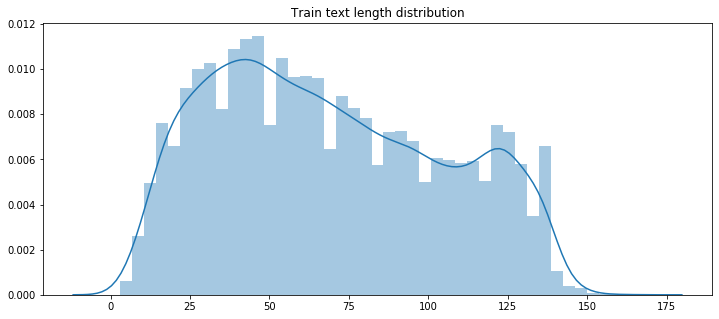

In [14]:
#for train text

lens = [len(x) for x in train.text]
plt.figure(figsize=(12, 5));
print ("max: {}, min: {}, mean: {:.5}".format(max(lens), min(lens), np.mean(lens)))
sns.distplot(lens);
plt.title('Train text length distribution')

max: 141, min: 1, mean: 36.747


Text(0.5, 1.0, 'Train selected_text length distribution')

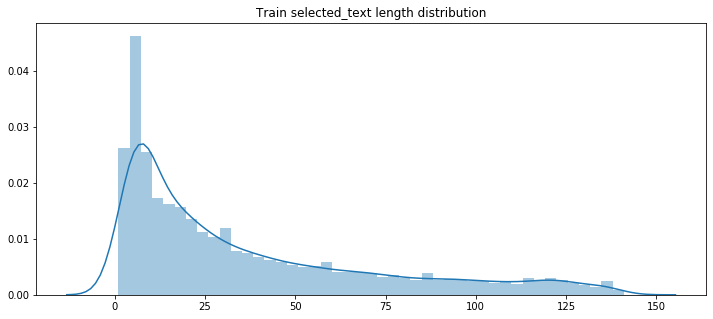

In [15]:
# for train selected_text

lens = [len(x) for x in train.selected_text]
plt.figure(figsize=(12, 5));
print ("max: {}, min: {}, mean: {:.5}".format(max(lens), min(lens), np.mean(lens)))
sns.distplot(lens);
plt.title('Train selected_text length distribution')

max: 155, min: 4, mean: 68.188


Text(0.5, 1.0, 'Test text length distribution')

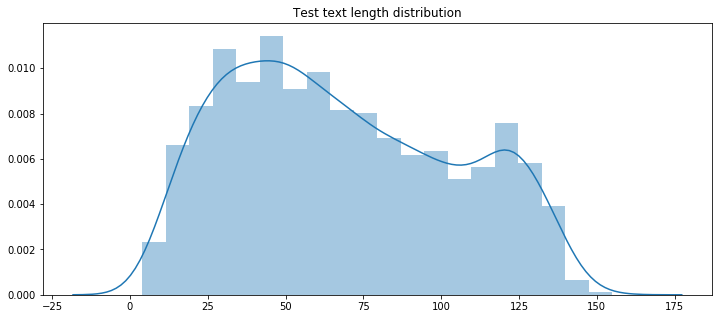

In [16]:
#for test text

lens = [len(x) for x in test.text]
plt.figure(figsize=(12, 5));
print ("max: {}, min: {}, mean: {:.5}".format(max(lens), min(lens), np.mean(lens)))
sns.distplot(lens);
plt.title('Test text length distribution')

### Word frequency function 

In [21]:
def word_frequency(data,return_word_frequency):
    for word in data.split():
        if return_word_frequency.get(word, False): return_word_frequency[word]+=1
        else: return_word_frequency[word]=1
    return return_word_frequency

### Data cleaning 

In [18]:
def get_char_only(text):
    chars = re.compile(r"[^a-zA-Z]")
    return chars.sub(r' ',text)

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    text=html.sub(r'',text)
    return text
    
def remove_stoping_words(text):
    stop=set(stopwords.words('english'))
    return " ".join([x for x in word_tokenize(text) if x not in stop])

# def remove_stoping_words(data):
#     return [ remove_stopwords_statment(i) for i in data]

def remove_emoji(text): 
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_tag(text):
    return ' '.join(re.sub("[@][\w_-]+"," ",text).split())


def clean_data(data): # data must by list only
    data= data.apply(lambda x : remove_html(x))
    data= data.apply(lambda x : remove_URL(x))
    data= data.apply(lambda x : remove_emoji(x))
    data= data.apply(lambda x : remove_tag(x))
    data= data.apply(lambda x : get_char_only(x))
    data= data.apply(lambda x : remove_stoping_words(x))    
    return data

def clean_train():
    train_df=train.copy()
    train_df.text=clean_data(data=train.text)
    train_df.selected_text=clean_data(train.selected_text)
    return train_df
    
def clean_test():
    test.text=clean_data(test.text)

In [51]:
train_df = clean_train()
train_df.head(100)

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,Spent entire morning meeting w vendor boss happy w Lots fun I plans morning,boss happy w Lots fun,neutral
1,251b6a6766,Oh Good idea putting ice cream,Good,positive
2,c9e8d1ef1c,says good say bad afternoon,says good say bad afternoon,neutral
3,f14f087215,dont think vote anymore tried,dont think vote anymore,negative
4,bf7473b12d,haha better drunken tweeting mean,better,positive
5,1915bebcb3,headache wan na see Julie,headache,negative
6,2ab82634d5,awsome salad I recommend getting Spicey buffalo chicken salad,awsome salad,positive
7,a5a1c996c0,fine Going big walk today miles,fine,positive
8,a182b2638e,Thank yoou TwitterTakeover,Thank,positive
9,1dcb6fdb13,Why adobe realise one WANTS pay Photoshop et al give us free,Why adobe realise one WANTS pay Photoshop et al give us free,neutral


In [36]:
train_text_freq={}
for i in train_df.text:
    train_count_freq = word_frequency(i,train_text_freq)
    
# train_text_freq = train_df.text.apply(lambda x : word_frequency(x,train_text_freq) )

sorted_train_text_freq = sorted(train_text_freq.items(), key=operator.itemgetter(1))
print(sorted_train_text_freq[-11:-1])

[('going', 951), ('today', 1061), ('work', 1097), ('got', 1097), ('go', 1215), ('good', 1273), ('quot', 1292), ('like', 1305), ('get', 1388), ('day', 1679)]


In [37]:
train_selected_text_freq={}
for i in train_df.selected_text:
    train_selected_text_freq = word_frequency(i,train_selected_text_freq)
    
# train_text_freq = train_df.text.apply(lambda x : word_frequency(x,train_text_freq) )

sorted_train_selected_text_freq = sorted(train_selected_text_freq.items(), key=operator.itemgetter(1))
print(sorted_train_selected_text_freq[-11:-1])

[('today', 536), ('got', 569), ('work', 593), ('quot', 607), ('go', 660), ('like', 746), ('love', 749), ('get', 750), ('day', 877), ('good', 1011)]
